# Exploratory Analysis and Modeling

**Exploratory analysis:** 
starting with midfielders as this is the most varied category of players

Let's look at correlation between the variables. First we'll filter to midfield players who averaged at least 2 point per game over 5 games (made 5 appearances). 

In [1]:
import pandas as pd

In [2]:
last_5_df = pd.read_csv('data/last_5_gw14-19.csv')

In [3]:
# filter mids who have >=5 FPL points over the last 5 games
last_5_df_filter = last_5_df[(last_5_df['position'] == 'MID') &
                            (last_5_df['mean_points'] >= 2)]
last_5_df_filter

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
236,0,Granit Xhaka,3,Arsenal,MID,2.8,71.8,0.0,0.2,0.4,...,15.08,12.2,4.12,0.03624,0.077746,0.113986,0.57878,1134.0,1132.0,2
238,0,Thomas Partey,6,Arsenal,MID,3.4,86.6,0.2,0.0,0.6,...,12.94,13.2,4.36,0.14324,0.076232,0.219472,0.63094,1134.0,1132.0,3
239,0,Martin Ødegaard,7,Arsenal,MID,10.6,88.4,0.8,0.6,0.6,...,43.00,40.4,12.88,0.44374,0.365186,0.808926,0.69526,1134.0,1132.0,2
242,0,Bukayo Saka,13,Arsenal,MID,5.4,77.2,0.4,0.4,0.4,...,39.24,14.0,8.26,0.25732,0.168212,0.425532,0.64568,1134.0,1132.0,3
244,0,Gabriel Martinelli Silva,19,Arsenal,MID,7.0,83.8,0.6,0.4,0.6,...,10.08,40.4,7.62,0.24616,0.086052,0.332212,0.70508,1134.0,1132.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0,Lucas Tolentino Coelho de Lima,603,West Ham,MID,2.0,70.2,0.0,0.2,0.0,...,19.30,10.6,4.44,0.08040,0.043708,0.124108,1.29040,1162.0,1158.0,8
517,0,Rúben da Silva Neves,480,Wolves,MID,4.2,90.0,0.4,0.0,0.0,...,12.36,18.6,5.62,0.23550,0.015738,0.251238,1.76236,1154.0,1180.0,2
519,0,Daniel Castelo Podence,483,Wolves,MID,2.8,61.8,0.2,0.2,0.0,...,15.56,31.4,6.26,0.14864,0.051886,0.200526,1.09206,1154.0,1180.0,7
524,0,João Filipe Iria Santos Moutinho,503,Wolves,MID,2.6,71.0,0.0,0.2,0.2,...,10.98,5.6,2.46,0.02482,0.074754,0.099574,1.42642,1154.0,1180.0,4


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# correlation with latest points
last_5_df_filter.corrwith(last_5_df_filter['latest_points']).dropna().sort_values()

mean_opp_def          -0.231889
mean_opp_att          -0.117311
mean_own_goals        -0.106701
mean_clean_sheets     -0.013570
mean_goals_scored      0.012817
mean_xg                0.043293
mean_bonus             0.049170
id                     0.066859
mean_points            0.079150
mean_assists           0.105187
mean_influence         0.125301
mean_xgi               0.150774
mean_xgc               0.155140
mean_bps               0.169598
mean_goals_conceded    0.171133
mean_creativity        0.178178
mean_threat            0.181243
mean_minutes           0.213153
mean_ict               0.216555
mean_xa                0.227253
latest_points          1.000000
dtype: float64

For this data, minutes, ICT, expected assists, and opposition defensive strength (negative) seem to have the highest correlation with latest points. However, the correlation bewtween all variables and latest points is low.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'mean_points'}>,
        <AxesSubplot:title={'center':'mean_minutes'}>,
        <AxesSubplot:title={'center':'mean_goals_scored'}>],
       [<AxesSubplot:title={'center':'mean_assists'}>,
        <AxesSubplot:title={'center':'mean_clean_sheets'}>,
        <AxesSubplot:title={'center':'mean_goals_conceded'}>,
        <AxesSubplot:title={'center':'mean_own_goals'}>,
        <AxesSubplot:title={'center':'mean_saves'}>],
       [<AxesSubplot:title={'center':'mean_bonus'}>,
        <AxesSubplot:title={'center':'mean_bps'}>,
        <AxesSubplot:title={'center':'mean_influence'}>,
        <AxesSubplot:title={'center':'mean_creativity'}>,
        <AxesSubplot:title={'center':'mean_threat'}>],
       [<AxesSubplot:title={'center':'mean_ict'}>,
        <AxesSubplot:title={'center':'mean_xg'}>,
        <AxesSubplot:title={'center':'mean_xa'}>,
        <AxesSubplo

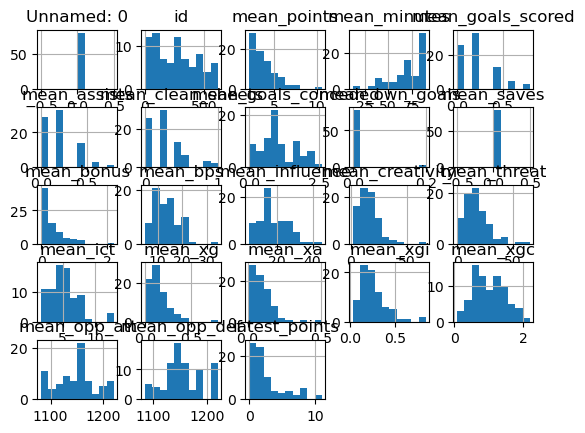

In [6]:
last_5_df_filter.hist()

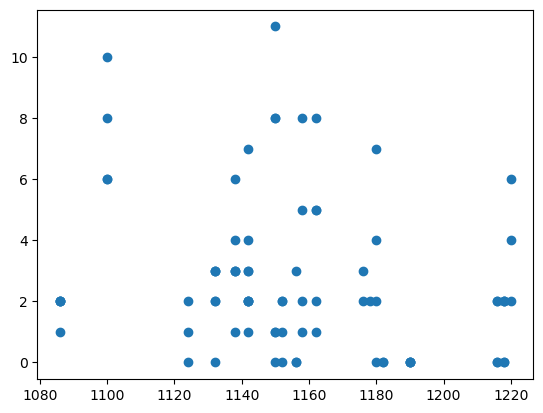

In [7]:
plt.scatter('mean_opp_def', 'latest_points', data = last_5_df_filter)

# Predicting next fixture points using regression
Trying linear regression for better speed vs. KNN regression

## Midfield Players

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [10]:
#import data
last_5 = pd.read_csv("data/last_5_gw14-19.csv")

#filter midfielders
last_5 = last_5[(last_5['position'] == 'MID') &
                (last_5['mean_points'] >= 1)]

# split the data for training and testing using 60:40 split
last_5_df_train, last_5_df_test = train_test_split(
    last_5, train_size=0.6, random_state=1234
)

In [ ]:
lm = linear_model.LinearRegression()
X_train = last_5_df_train[["mean_minutes", "mean_ict", "mean_xa", "mean_opp_def", "mean_xgi"]]
y_train = last_5_df_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train, y_train)

In [ ]:
import numpy as np

In [ ]:
X_test = last_5_df_test[["mean_minutes", "mean_ict", "mean_xa", "mean_opp_def", "mean_xgi"]]
y_test = last_5_df_test[["latest_points"]]

# predict on test data
last_5_preds = last_5_df_test
last_5_preds = last_5_preds.assign(predicted=lm.predict(X_test))

# calculate RMSPE
from sklearn.metrics import mean_squared_error

RMSPE = np.sqrt(
    mean_squared_error(y_true=last_5_preds["latest_points"], y_pred=last_5_preds["predicted"])
)

RMSPE


Since RMSPE is in units of the response variable "latest_points", the prediction appears to be accurate to within ~2 points. This is a decent prediction, considering the variability associated with football player performance. As midfielders get most of their FPL points from goals and assists and football is a relatively low scoring game, it is expected that it is hard to accurately predict whether any individual player will score points.

In [ ]:
# show the highest predicted points
last_5_preds.sort_values('predicted', ascending=False).head(10)

## Model Considerations and Improvements

- Data analyzed from one single 6-week span so far. Perhaps we can reduce noise if data is collected across the whole season or multiple season. This would involve collecting data for each gameweek and the 5 preceeding gameweeks and appending it to the data as was done in this program.
- The predictor doesn't currently consider opposition strength for the next fixture. I expect that players playing stronger teams are likely to return fewer points, especially those players who play for weaker teams. 
- This predictor attempts to analyze player form over 5 consecutive fixtures, assuming that they will maintain that form. Despite being elite athletes, football players are human and can go through periods of good and bad form. 